In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# LAB2

## STEP 1

In [2]:
df = pd.read_csv('Documentation/lab2_data.csv', )
df

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance
0,1,Motorcycle,0.0,0.000
1,1,Motorcycle,0.4,0.000
2,1,Motorcycle,0.8,0.000
3,1,Motorcycle,1.2,0.000
4,1,Motorcycle,1.6,0.000
...,...,...,...,...
580205,2476,Car,952.8,11.846
580206,2477,Car,951.6,0.000
580207,2477,Car,952.0,3.387
580208,2477,Car,952.4,6.944


c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

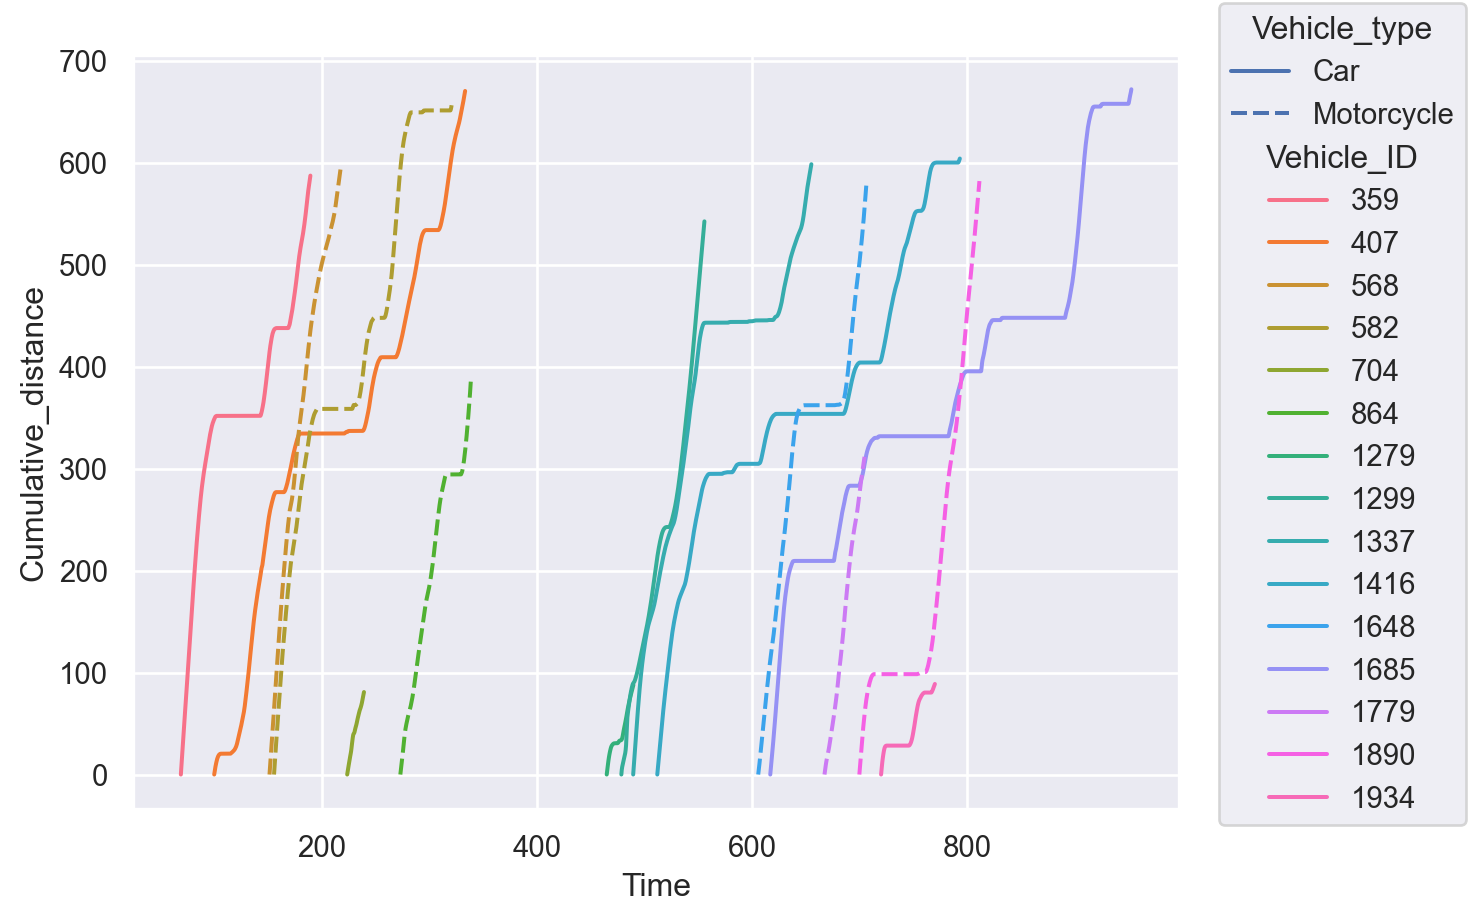

In [3]:
sample = np.random.choice(df.Vehicle_ID.unique(),15)
(
    so.Plot(df.loc[df.Vehicle_ID.isin(sample)], x="Time", y="Cumulative_distance", linestyle="Vehicle_type", color="Vehicle_ID")
    .add(so.Line())
    .scale(color=so.Nominal())
    .plot()
)

In [4]:
#Create distance, speed and acceleration in function of time
df["distance"] = df.groupby("Vehicle_ID")["Cumulative_distance"].diff()
df["dt"] = df.groupby("Vehicle_ID")["Time"].diff()
df["speed"] = df.distance / df.dt
df["acceleration"] = df.speed.diff() / df.dt

df

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance,distance,dt,speed,acceleration
0,1,Motorcycle,0.0,0.000,NaN,NaN,NaN,NaN
1,1,Motorcycle,0.4,0.000,0.000,0.4,0.0000,NaN
2,1,Motorcycle,0.8,0.000,0.000,0.4,0.0000,0.00000
3,1,Motorcycle,1.2,0.000,0.000,0.4,0.0000,0.00000
4,1,Motorcycle,1.6,0.000,0.000,0.4,0.0000,0.00000
...,...,...,...,...,...,...,...,...
580205,2476,Car,952.8,11.846,2.524,0.4,6.3100,-2.85625
580206,2477,Car,951.6,0.000,NaN,NaN,NaN,NaN
580207,2477,Car,952.0,3.387,3.387,0.4,8.4675,NaN
580208,2477,Car,952.4,6.944,3.557,0.4,8.8925,1.06250


In [5]:
df["mode"] = "IDLE"
df.loc[df.acceleration > 0.5, "mode"] = "ACC"
df.loc[df.acceleration < -0.5, "mode"] = "DEC"
df.loc[(df.speed > 0.28) * (abs(df.acceleration)<=0.5), "mode"] = "CRUISE"

display(df)
df["mode"].value_counts()

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance,distance,dt,speed,acceleration,mode
0,1,Motorcycle,0.0,0.000,NaN,NaN,NaN,NaN,IDLE
1,1,Motorcycle,0.4,0.000,0.000,0.4,0.0000,NaN,IDLE
2,1,Motorcycle,0.8,0.000,0.000,0.4,0.0000,0.00000,IDLE
3,1,Motorcycle,1.2,0.000,0.000,0.4,0.0000,0.00000,IDLE
4,1,Motorcycle,1.6,0.000,0.000,0.4,0.0000,0.00000,IDLE
...,...,...,...,...,...,...,...,...,...
580205,2476,Car,952.8,11.846,2.524,0.4,6.3100,-2.85625,DEC
580206,2477,Car,951.6,0.000,NaN,NaN,NaN,NaN,IDLE
580207,2477,Car,952.0,3.387,3.387,0.4,8.4675,NaN,IDLE
580208,2477,Car,952.4,6.944,3.557,0.4,8.8925,1.06250,ACC


mode
IDLE      229424
DEC       120584
CRUISE    118130
ACC       112072
Name: count, dtype: int64

c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

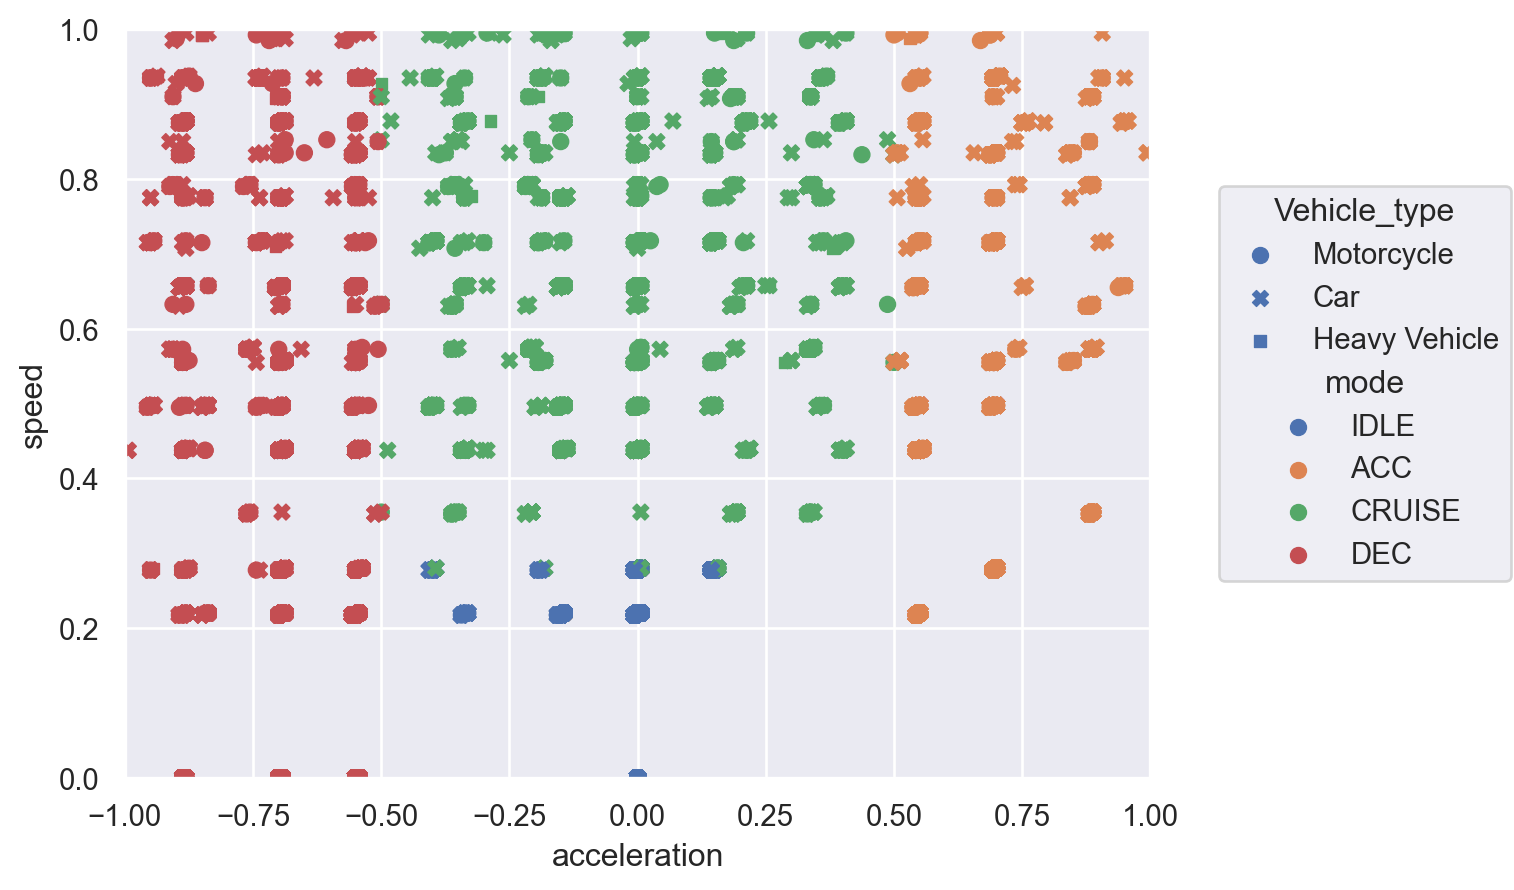

In [6]:
(
    so.Plot(df, x="acceleration", y="speed", marker="Vehicle_type", color="mode")
    .add(so.Dot())
    .scale(color=so.Nominal())
    .limit(x=(-1,1), y=(0,1))
    .plot()
)

c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

<Axes: >

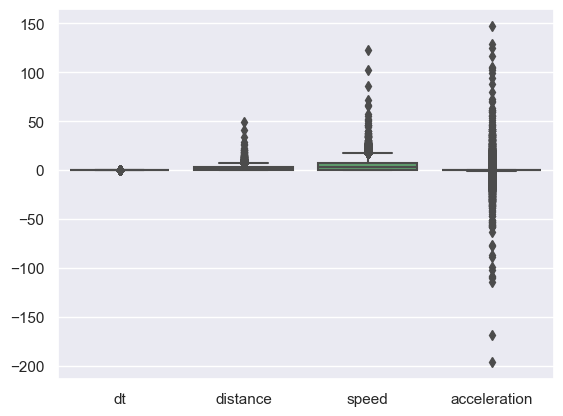

In [14]:
sns.set_theme()
sns.boxplot(df[["dt", "distance", "speed", "acceleration"]])

In [7]:
display(df)

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance,distance,dt,speed,acceleration,mode
0,1,Motorcycle,0.0,0.000,NaN,NaN,NaN,NaN,IDLE
1,1,Motorcycle,0.4,0.000,0.000,0.4,0.0000,NaN,IDLE
2,1,Motorcycle,0.8,0.000,0.000,0.4,0.0000,0.00000,IDLE
3,1,Motorcycle,1.2,0.000,0.000,0.4,0.0000,0.00000,IDLE
4,1,Motorcycle,1.6,0.000,0.000,0.4,0.0000,0.00000,IDLE
...,...,...,...,...,...,...,...,...,...
580205,2476,Car,952.8,11.846,2.524,0.4,6.3100,-2.85625,DEC
580206,2477,Car,951.6,0.000,NaN,NaN,NaN,NaN,IDLE
580207,2477,Car,952.0,3.387,3.387,0.4,8.4675,NaN,IDLE
580208,2477,Car,952.4,6.944,3.557,0.4,8.8925,1.06250,ACC


c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

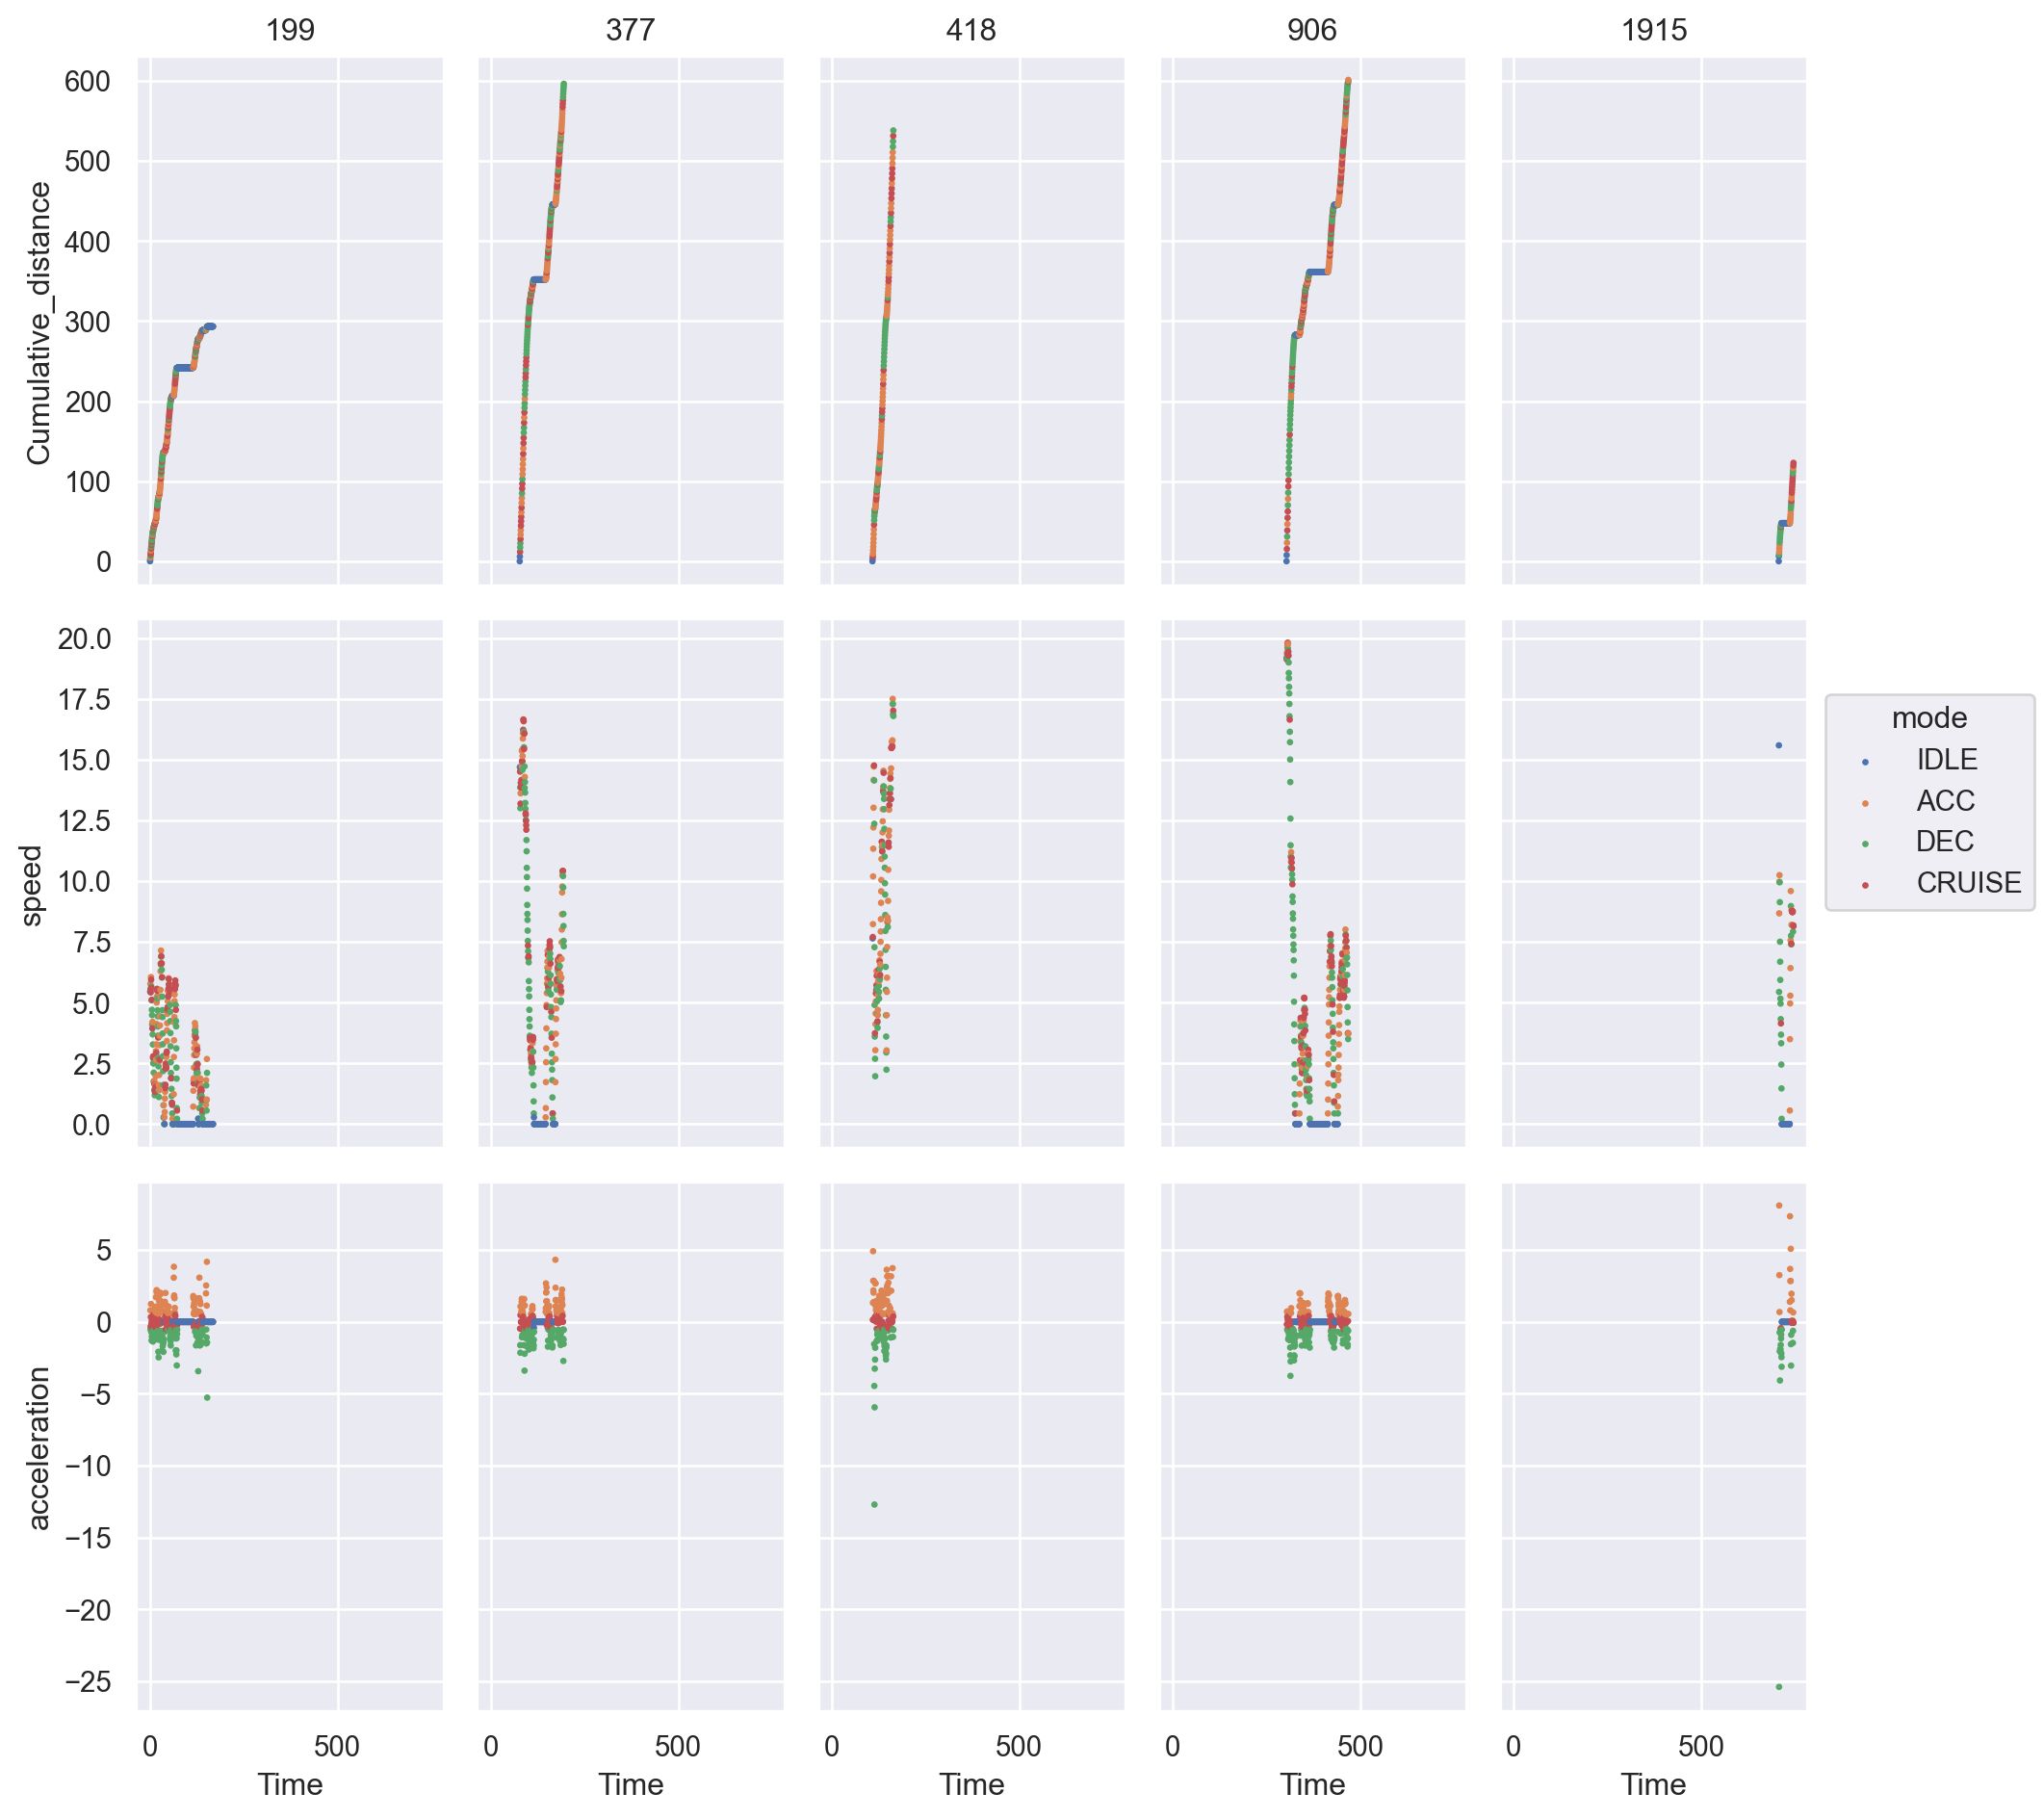

In [8]:
sample = np.random.choice(df.Vehicle_ID.unique(),5)
(
    so.Plot(df.loc[df.Vehicle_ID.isin(sample)], x="Time", color="mode")
    .pair(y=["Cumulative_distance", "speed", "acceleration"])
    .facet(col="Vehicle_ID")
    .add(so.Dot(pointsize=2), so.Dodge())
    .scale(color=so.Nominal())
    .layout(size=(10,10))
    .plot()
)

## Step 2

In [9]:
emission = lambda v : 0.55 * (891 - 22.1360 * v + 0.2346 * v**2 -0.0007 * v**3)  # noqa: E731
kmh = lambda ms : 3.6 * ms  # noqa: E731


df["emission_rate_EMFAC"] = df.speed.apply(lambda x: emission(kmh(x)))
df["emission_EMFAC"] = (df.emission_rate_EMFAC * df.distance/1000)
total_emission = df.emission_EMFAC.sum()
total_travelled = df.distance.sum() / 1000
average_emission = total_emission / total_travelled

print(f"The total CO2 emitted is : {total_emission / 1000:,.0f} kg CO2")
print(f"The total distance travelled is {total_travelled:,.0f} km, which makes for an average emission rate of {average_emission:,.0f} g/km")
display(df[["distance", "dt", "speed", "acceleration", "mode", "emission_rate_EMFAC", "emission_EMFAC"]])

The total CO2 emitted is : 220 kg CO2
The total distance travelled is 924 km, which makes for an average emission rate of 238 g/km


,distance,dt,speed,acceleration,mode,emission_rate_EMFAC,emission_EMFAC
0,NaN,NaN,NaN,NaN,IDLE,NaN,NaN
1,0.000,0.4,0.0000,NaN,IDLE,490.050000,0.000000
2,0.000,0.4,0.0000,0.00000,IDLE,490.050000,0.000000
3,0.000,0.4,0.0000,0.00000,IDLE,490.050000,0.000000
4,0.000,0.4,0.0000,0.00000,IDLE,490.050000,0.000000
...,...,...,...,...,...,...,...
580205,2.524,0.4,6.3100,-2.85625,DEC,275.555966,0.695503
580206,NaN,NaN,NaN,NaN,IDLE,NaN,NaN
580207,3.387,0.4,8.4675,NaN,IDLE,227.916757,0.771954
580208,3.557,0.4,8.8925,1.06250,ACC,219.901161,0.782188


c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


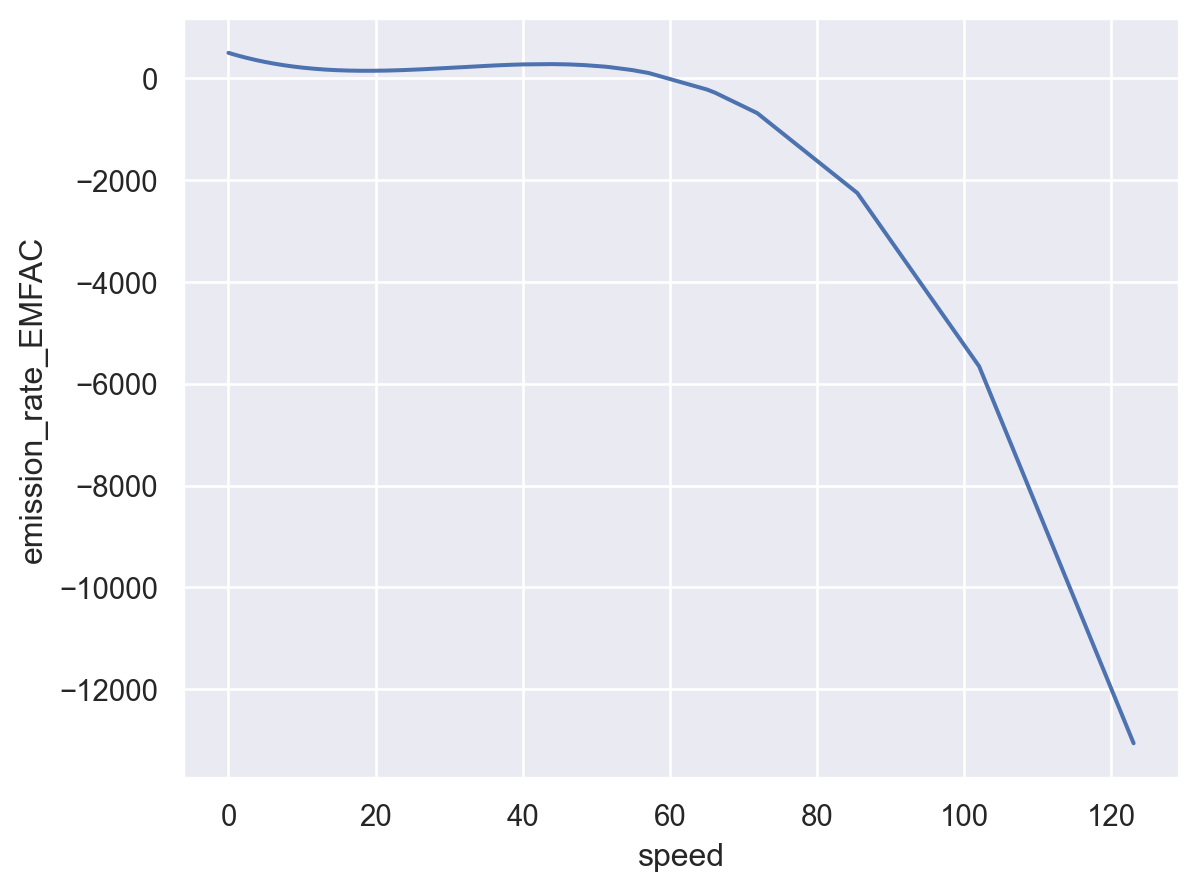

In [10]:
(
    so.Plot(data=df, x="speed", y="emission_rate_EMFAC")
    .add(so.Line())
    .plot()
)

## Step 3

In [11]:
df["emission_rate_Modal"] = df["mode"].map({"IDLE":0.7, "ACC": 2.8, "DEC": 1.4, "CRUISE": 1.8}) * df.Vehicle_type.map({"Car": 1, "Motorcycle" : 0.5, "Heavy Vehicle":5})
 
df["emission_Modal"] = (df.emission_rate_Modal * df.dt)
total_emission = df.emission_Modal.sum()
total_travel_time = df.dt.sum()
average_emission = total_emission / total_travelled

print(f"The total CO2 emitted is : {total_emission / 1000:,.0f} kg CO2")
print(f"The total travel time is {total_travel_time:,.0f} s ({total_travel_time/3600:.1f} h), which makes for an average emission rate of {average_emission:,.0f} g/s")
display(df[["distance", "dt", "speed", "acceleration", "mode", "emission_EMFAC", "emission_rate_Modal", "emission_Modal"]])

The total CO2 emitted is : 366 kg CO2
The total travel time is 231,093 s (64.2 h), which makes for an average emission rate of 396 g/s


,distance,dt,speed,acceleration,mode,emission_EMFAC,emission_rate_Modal,emission_Modal
0,NaN,NaN,NaN,NaN,IDLE,NaN,0.35,NaN
1,0.000,0.4,0.0000,NaN,IDLE,0.000000,0.35,0.14
2,0.000,0.4,0.0000,0.00000,IDLE,0.000000,0.35,0.14
3,0.000,0.4,0.0000,0.00000,IDLE,0.000000,0.35,0.14
4,0.000,0.4,0.0000,0.00000,IDLE,0.000000,0.35,0.14
...,...,...,...,...,...,...,...,...
580205,2.524,0.4,6.3100,-2.85625,DEC,0.695503,1.40,0.56
580206,NaN,NaN,NaN,NaN,IDLE,NaN,0.70,NaN
580207,3.387,0.4,8.4675,NaN,IDLE,0.771954,0.70,0.28
580208,3.557,0.4,8.8925,1.06250,ACC,0.782188,2.80,1.12


In [12]:
#Sanity check
sanity_check = pd.DataFrame(df.groupby("Vehicle_type")["dt"].sum().rename("Total travel time [s]"))
sanity_check["Total emissions [g CO2]"] = (df.emission_Modal).groupby(df.Vehicle_type).sum()
sanity_check["Average emissions [g/s]"] = sanity_check["Total emissions [g CO2]"]/sanity_check["Total travel time [s]"]

display(sanity_check)


,Total travel time [s],Total emissions [g CO2],Average emissions [g/s]
Vehicle_type,,,
Car,164052.4,239758.64,1.461476
Heavy Vehicle,12059.6,83747.60,6.944476
Motorcycle,54981.2,42569.14,0.774249


## Step 4

In [13]:
VSP = lambda v, a : 0.278 * kmh(v) * (0.305 * kmh(a) + 0.132) + 0.0000065 * kmh(v)**2  # noqa: E731

df["VSP"] = df[["speed", "acceleration"]].apply(axis=1, func=lambda x: VSP(x.speed, x.acceleration))
df["VSP_mode"] = 14
df.loc[df.VSP < 39, "VSP_mode"] = 13
df.loc[df.VSP < 33, "VSP_mode"] = 12
df.loc[df.VSP < 28, "VSP_mode"] = 11
df.loc[df.VSP < 23, "VSP_mode"] = 10
df.loc[df.VSP < 19, "VSP_mode"] = 9
df.loc[df.VSP < 16, "VSP_mode"] = 8
df.loc[df.VSP < 13, "VSP_mode"] = 7
df.loc[df.VSP < 10, "VSP_mode"] = 6
df.loc[df.VSP < 7, "VSP_mode"] = 5
df.loc[df.VSP < 4, "VSP_mode"] = 4
df.loc[df.VSP < 1, "VSP_mode"] = 3
df.loc[df.VSP < 0, "VSP_mode"] = 2
df.loc[df.VSP < -2, "VSP_mode"] = 1


df[["speed", "acceleration","VSP", "VSP_mode"]]

,speed,acceleration,VSP,VSP_mode
0,NaN,NaN,NaN,14
1,0.0000,NaN,NaN,14
2,0.0000,0.00000,0.000000,3
3,0.0000,0.00000,0.000000,3
4,0.0000,0.00000,0.000000,3
...,...,...,...,...
580205,6.3100,-2.85625,-18.968076,1
580206,NaN,NaN,NaN,14
580207,8.4675,NaN,NaN,14
580208,8.8925,1.06250,11.563923,7


c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

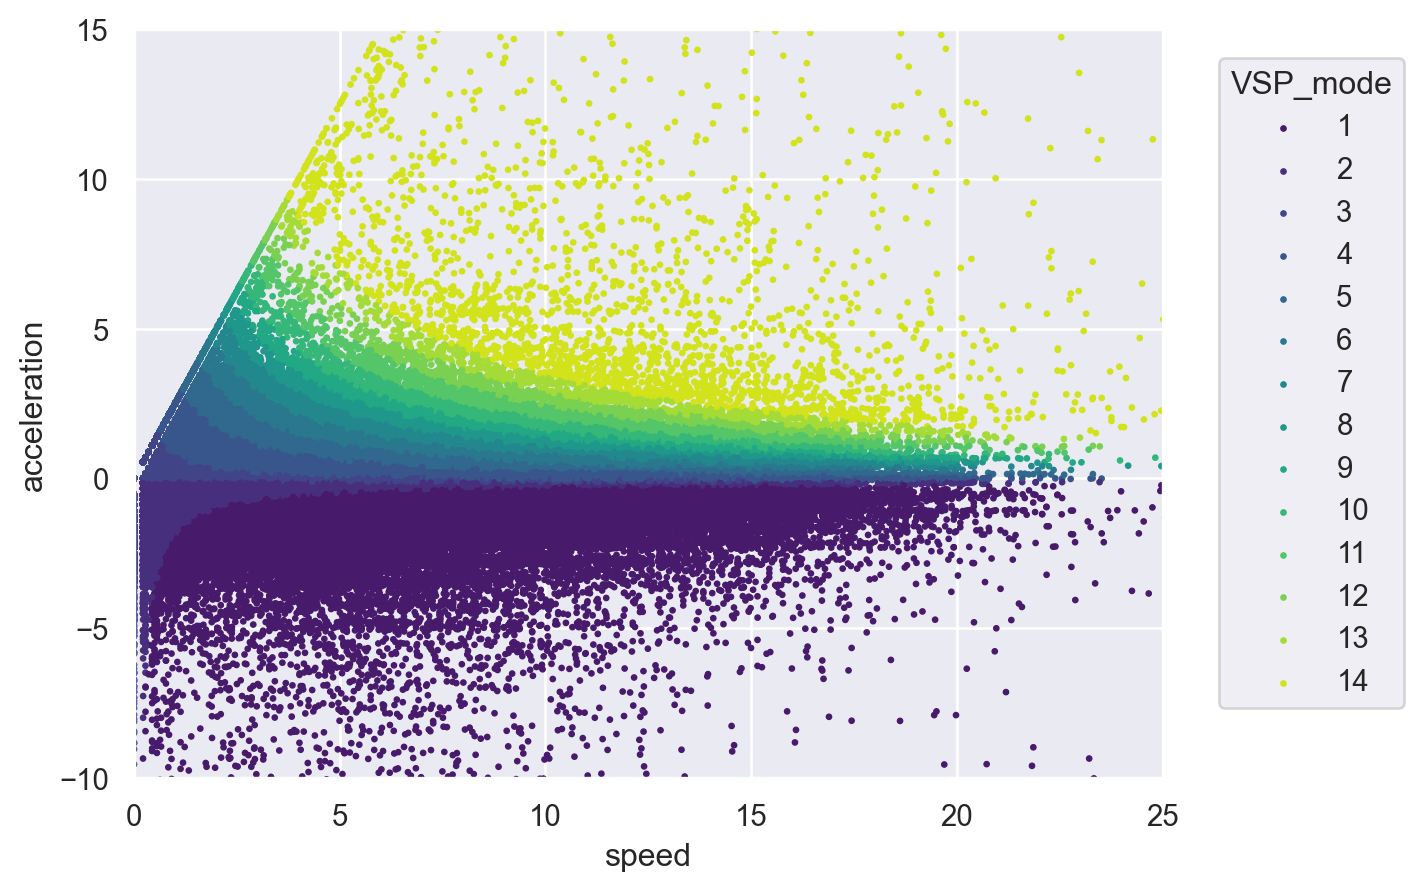

In [14]:
(
    so.Plot(data=df, x="speed", y="acceleration", color="VSP_mode")
    .add(so.Dot(pointsize=2))
    .scale(color=so.Nominal("viridis"))
    .limit(y=(-10,15), x=(0, 25))
    .plot()
)

In [15]:
#Computing emissions

df["emission_rate_VSP"] = df.VSP_mode.map({
    1:1.30,
    2:1.43,
    3:0.97,
    4:2.03,
    5:2.74,
    6:3.42,
    7:4.02,
    8:4.56,
    9:5.08,
    10:5.61,
    11:6.05,
    12:6.41,
    13:6.86,
    14:7.41
}) * df.Vehicle_type.map({"Car": 1, "Motorcycle" : 0.5, "Heavy Vehicle":5})

df["emission_VSP"] = df.emission_rate_VSP * df.dt


total_emission = df.emission_VSP.sum()
average_emission = total_emission / total_travelled

print(f"The total CO2 emitted is : {total_emission / 1000:,.0f} kg CO2")
print(f"The total travel time is {total_travel_time:,.0f} s ({total_travel_time/3600:.1f} h), which makes for an average emission rate of {average_emission:,.0f} g/s")
display(df[["distance", "dt", "speed", "acceleration", "mode", "emission_EMFAC", "emission_Modal", "emission_rate_VSP", "emission_VSP"]])

The total CO2 emitted is : 407 kg CO2
The total travel time is 231,093 s (64.2 h), which makes for an average emission rate of 440 g/s


,distance,dt,speed,acceleration,mode,emission_EMFAC,emission_Modal,emission_rate_VSP,emission_VSP
0,NaN,NaN,NaN,NaN,IDLE,NaN,NaN,3.705,NaN
1,0.000,0.4,0.0000,NaN,IDLE,0.000000,0.14,3.705,1.482
2,0.000,0.4,0.0000,0.00000,IDLE,0.000000,0.14,0.485,0.194
3,0.000,0.4,0.0000,0.00000,IDLE,0.000000,0.14,0.485,0.194
4,0.000,0.4,0.0000,0.00000,IDLE,0.000000,0.14,0.485,0.194
...,...,...,...,...,...,...,...,...,...
580205,2.524,0.4,6.3100,-2.85625,DEC,0.695503,0.56,1.300,0.520
580206,NaN,NaN,NaN,NaN,IDLE,NaN,NaN,7.410,NaN
580207,3.387,0.4,8.4675,NaN,IDLE,0.771954,0.28,7.410,2.964
580208,3.557,0.4,8.8925,1.06250,ACC,0.782188,1.12,4.020,1.608


In [16]:
#Sanity check
sanity_check = pd.DataFrame(df.groupby("Vehicle_type")["dt"].sum().rename("Total travel time [s]"))
sanity_check["Total emissions [g CO2]"] = (df.emission_VSP).groupby(df.Vehicle_type).sum()
sanity_check["Average emissions [g/s]"] = sanity_check["Total emissions [g CO2]"]/sanity_check["Total travel time [s]"]

display(sanity_check)


,Total travel time [s],Total emissions [g CO2],Average emissions [g/s]
Vehicle_type,,,
Car,164052.4,265536.136,1.618606
Heavy Vehicle,12059.6,89443.780,7.416812
Motorcycle,54981.2,51934.164,0.944580


## Step 5

In [17]:
df["is_aggressive"] = abs(df.acceleration) > 0.5
driver_aggressiveness = (df.is_aggressive * df.dt).groupby(df["Vehicle_ID"]).sum() / df.groupby("Vehicle_ID")["dt"].sum()

driver_behaviour = pd.Series(index=driver_aggressiveness.index, dtype=str)
driver_behaviour[:] = "Standard"
driver_behaviour.loc[driver_aggressiveness<0.3] = "Smooth"
driver_behaviour.loc[driver_aggressiveness>0.6] = "Aggressive"

display(driver_behaviour.value_counts())  # noqa: F821

Standard      1549
Aggressive     663
Smooth         265
Name: count, dtype: int64

In [18]:
#Link driver behaviour to the df and compute emissions by driver
df["driver_behaviour"] = df.Vehicle_ID.map(driver_behaviour)
df["driver_aggressiveness"] = df.Vehicle_ID.map(driver_aggressiveness)
df_cars = df.loc[df.Vehicle_type == "Car"]

by_driver_behaviour = df_cars.groupby("driver_behaviour")[["dt","distance", "emission_Modal"]].sum().rename(columns={"dt" : "Total time travelled [s]", "distance":"Total distance travelled [m]", "emission_Modal":"Total emissions [g CO2]"})
by_driver_behaviour["Number of drivers"] = driver_behaviour.value_counts()
by_driver_behaviour["mean emission rate [g/s]"] = by_driver_behaviour["Total emissions [g CO2]"] / by_driver_behaviour["Total time travelled [s]"]
by_driver_behaviour["mean emission rate [g/km]"] = by_driver_behaviour["Total emissions [g CO2]"] / by_driver_behaviour["Total distance travelled [m]"] * 1e3

shares = by_driver_behaviour / by_driver_behaviour.sum(axis=0)
display(by_driver_behaviour)
display(shares)

,Total time travelled [s],Total distance travelled [m],Total emissions [g CO2],Number of drivers,mean emission rate [g/s],mean emission rate [g/km]
driver_behaviour,,,,,,
Aggressive,11155.2,84370.325,21918.08,663,1.964831,259.784231
Smooth,33635.2,55524.693,36470.96,265,1.084309,656.842173
Standard,119262.0,460243.743,181369.60,1549,1.520766,394.072929


,Total time travelled [s],Total distance travelled [m],Total emissions [g CO2],Number of drivers,mean emission rate [g/s],mean emission rate [g/km]
driver_behaviour,,,,,,
Aggressive,0.067998,0.140585,0.091417,0.267662,0.429950,0.198203
Smooth,0.205027,0.092520,0.152115,0.106984,0.237272,0.501139
Standard,0.726975,0.766896,0.756467,0.625353,0.332778,0.300659


In [38]:
shares_unstack = shares.unstack().reset_index().rename(columns={"level_0":"Variable", 0:"Share"})
shares_unstack

,Variable,driver_behaviour,Share
0,Total time travelled [s],Aggressive,0.067998
1,Total time travelled [s],Smooth,0.205027
2,Total time travelled [s],Standard,0.726975
3,Total distance travelled [m],Aggressive,0.140585
4,Total distance travelled [m],Smooth,0.092520
5,Total distance travelled [m],Standard,0.766896
6,Total emissions [g CO2],Aggressive,0.091417
7,Total emissions [g CO2],Smooth,0.152115
8,Total emissions [g CO2],Standard,0.756467
9,Number of drivers,Aggressive,0.267662


c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

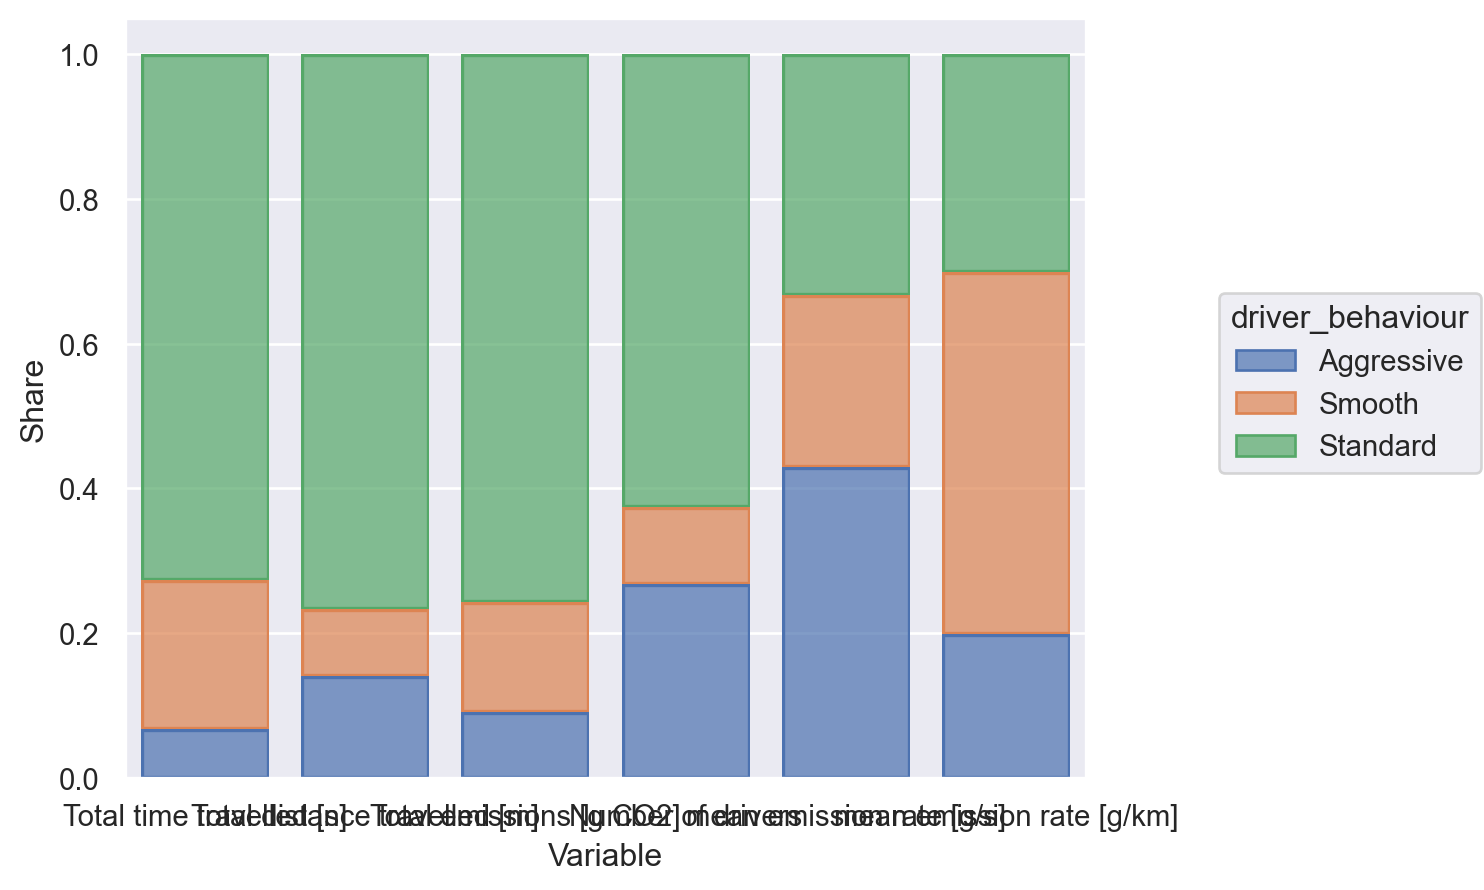

In [42]:
(
    so.Plot(data=shares_unstack, x="Variable", y="Share", color="driver_behaviour")
    .add(so.Bar(), so.Stack())
    .plot()
)

In [30]:
(
    so.Plot(data=df_cars, color="driver_aggressiveness", group="Vehicle_ID")
    .pair(x=["emission_Modal", "acceleration"])
    .add(so.Line(alpha=0.5), so.KDE(gridsize=1000))
    .facet(row="driver_behaviour")
    .layout(size=(10,10))
    .plot()
)

c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

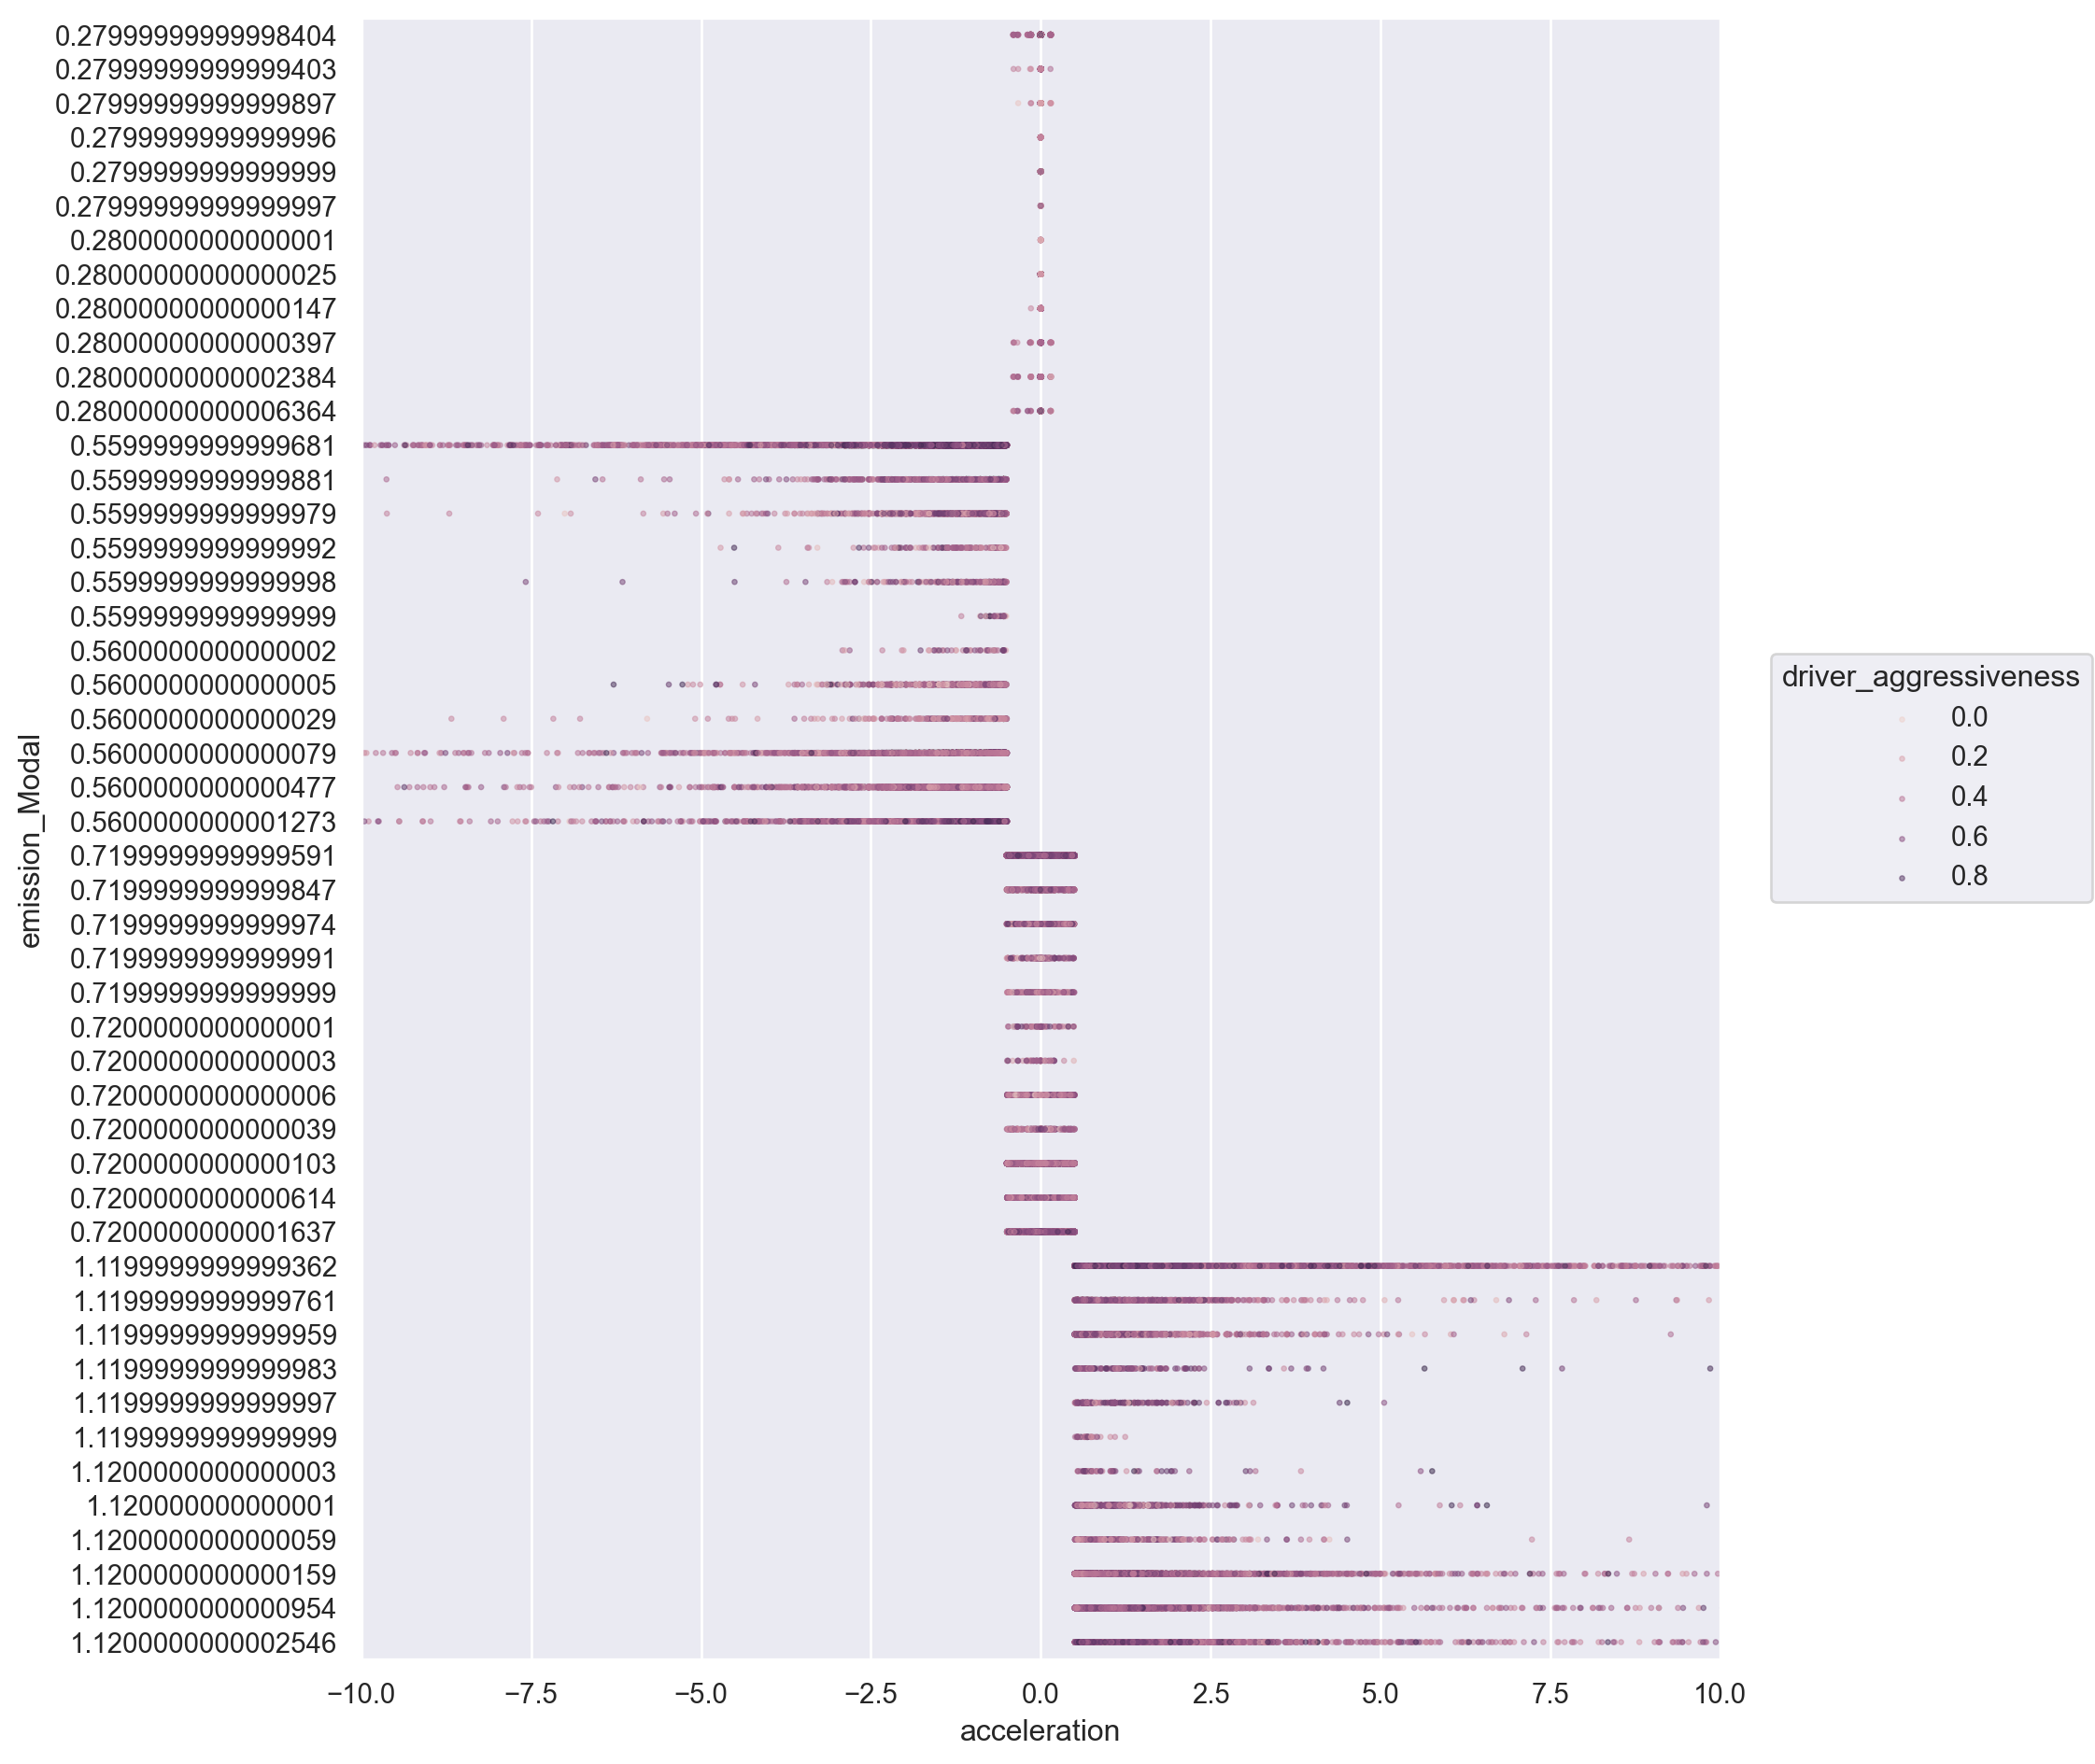

In [25]:
(
    so.Plot(data=df_cars, x="acceleration", y="emission_Modal", color="driver_aggressiveness")
    .add(so.Dot(alpha=0.5, pointsize=2))
    .limit(x=(-10,10))
    .layout(size=(10,10))
    .scale(y=so.Nominal())
    .plot()
)